# 项目简介
使用1980年-2009年20N-20S，130E-70W区域月平均海温资料sst1980_2009.nc，绘制该区域1980-2009年平均海表温度时间分布，要求体现年变化和季节变化，对图片进行修饰以达到一定程度的美观

## 数据来源：
https://psl.noaa.gov/data/gridded/data.cobe.html
已对原始数据进行裁剪

## 绘图要点：
(1)熟悉等高线图的概念及其能够展示的信息

(2)了解所用数据的维度（结构），能够思考所需的计算方法（函数）

(3)熟悉修饰、美化所绘制的图片的一些技巧

## 配套视频链接：
【【鼠鼠】海洋科研绘图11：等高线图增强版】 https://www.bilibili.com/video/BV1F841187Va

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.pyplot import MultipleLocator

C:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
#导入文件
filename = r'D:\bllibili\data\sst1980_2009.nc'
f = xr.open_dataset(filename)

#查看文件信息
print(f)

<xarray.Dataset>
Dimensions:  (lat: 40, lon: 160, time: 360)
Coordinates:
  * lat      (lat) float32 19.5 18.5 17.5 16.5 15.5 ... -16.5 -17.5 -18.5 -19.5
  * lon      (lon) float32 130.5 131.5 132.5 133.5 ... 286.5 287.5 288.5 289.5
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2009-12-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    title:            COBE Sea Surface Temperature Analysis
    history:          created June 2011 at ESRL/PSD using the grib data from ...
    platform:         Analyses
    original_source:  http://near-goos1.jodc.go.jp/cgi-bin/1997/near_goos_cat...
    Conventions:      CF-1.2
    institution:      NOAA ESRL/PSD
    comment:          recent values (w/i last year) may change as dataset is ...
    dataset_title:    COBE Sea Surface Temperature
    References:       https://www.psl.noaa.gov/data/gridded/data.cobe.html


C:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
#提取数据
sst = f['sst'].data
lat = f['lat'].data
lon = f['lon'].data
time = f['time'].data

In [5]:
#对lat和lon维度作平均→区域平均
sst_mean = np.nanmean(sst,axis=(1,2))

#按年、月维度对数组形状进行整理
sst_mean = sst_mean.reshape(12,30)

In [6]:
#contourf图的维度（月、日）
years = list(range(1980,2010))
months = list(range(1,13))

#画图网格
X,Y = np.meshgrid(years,months)

In [7]:
# 设置字体格式（Times New Roman）
plt.rc('font', family='Times New Roman')
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.unicode_minus'] = True

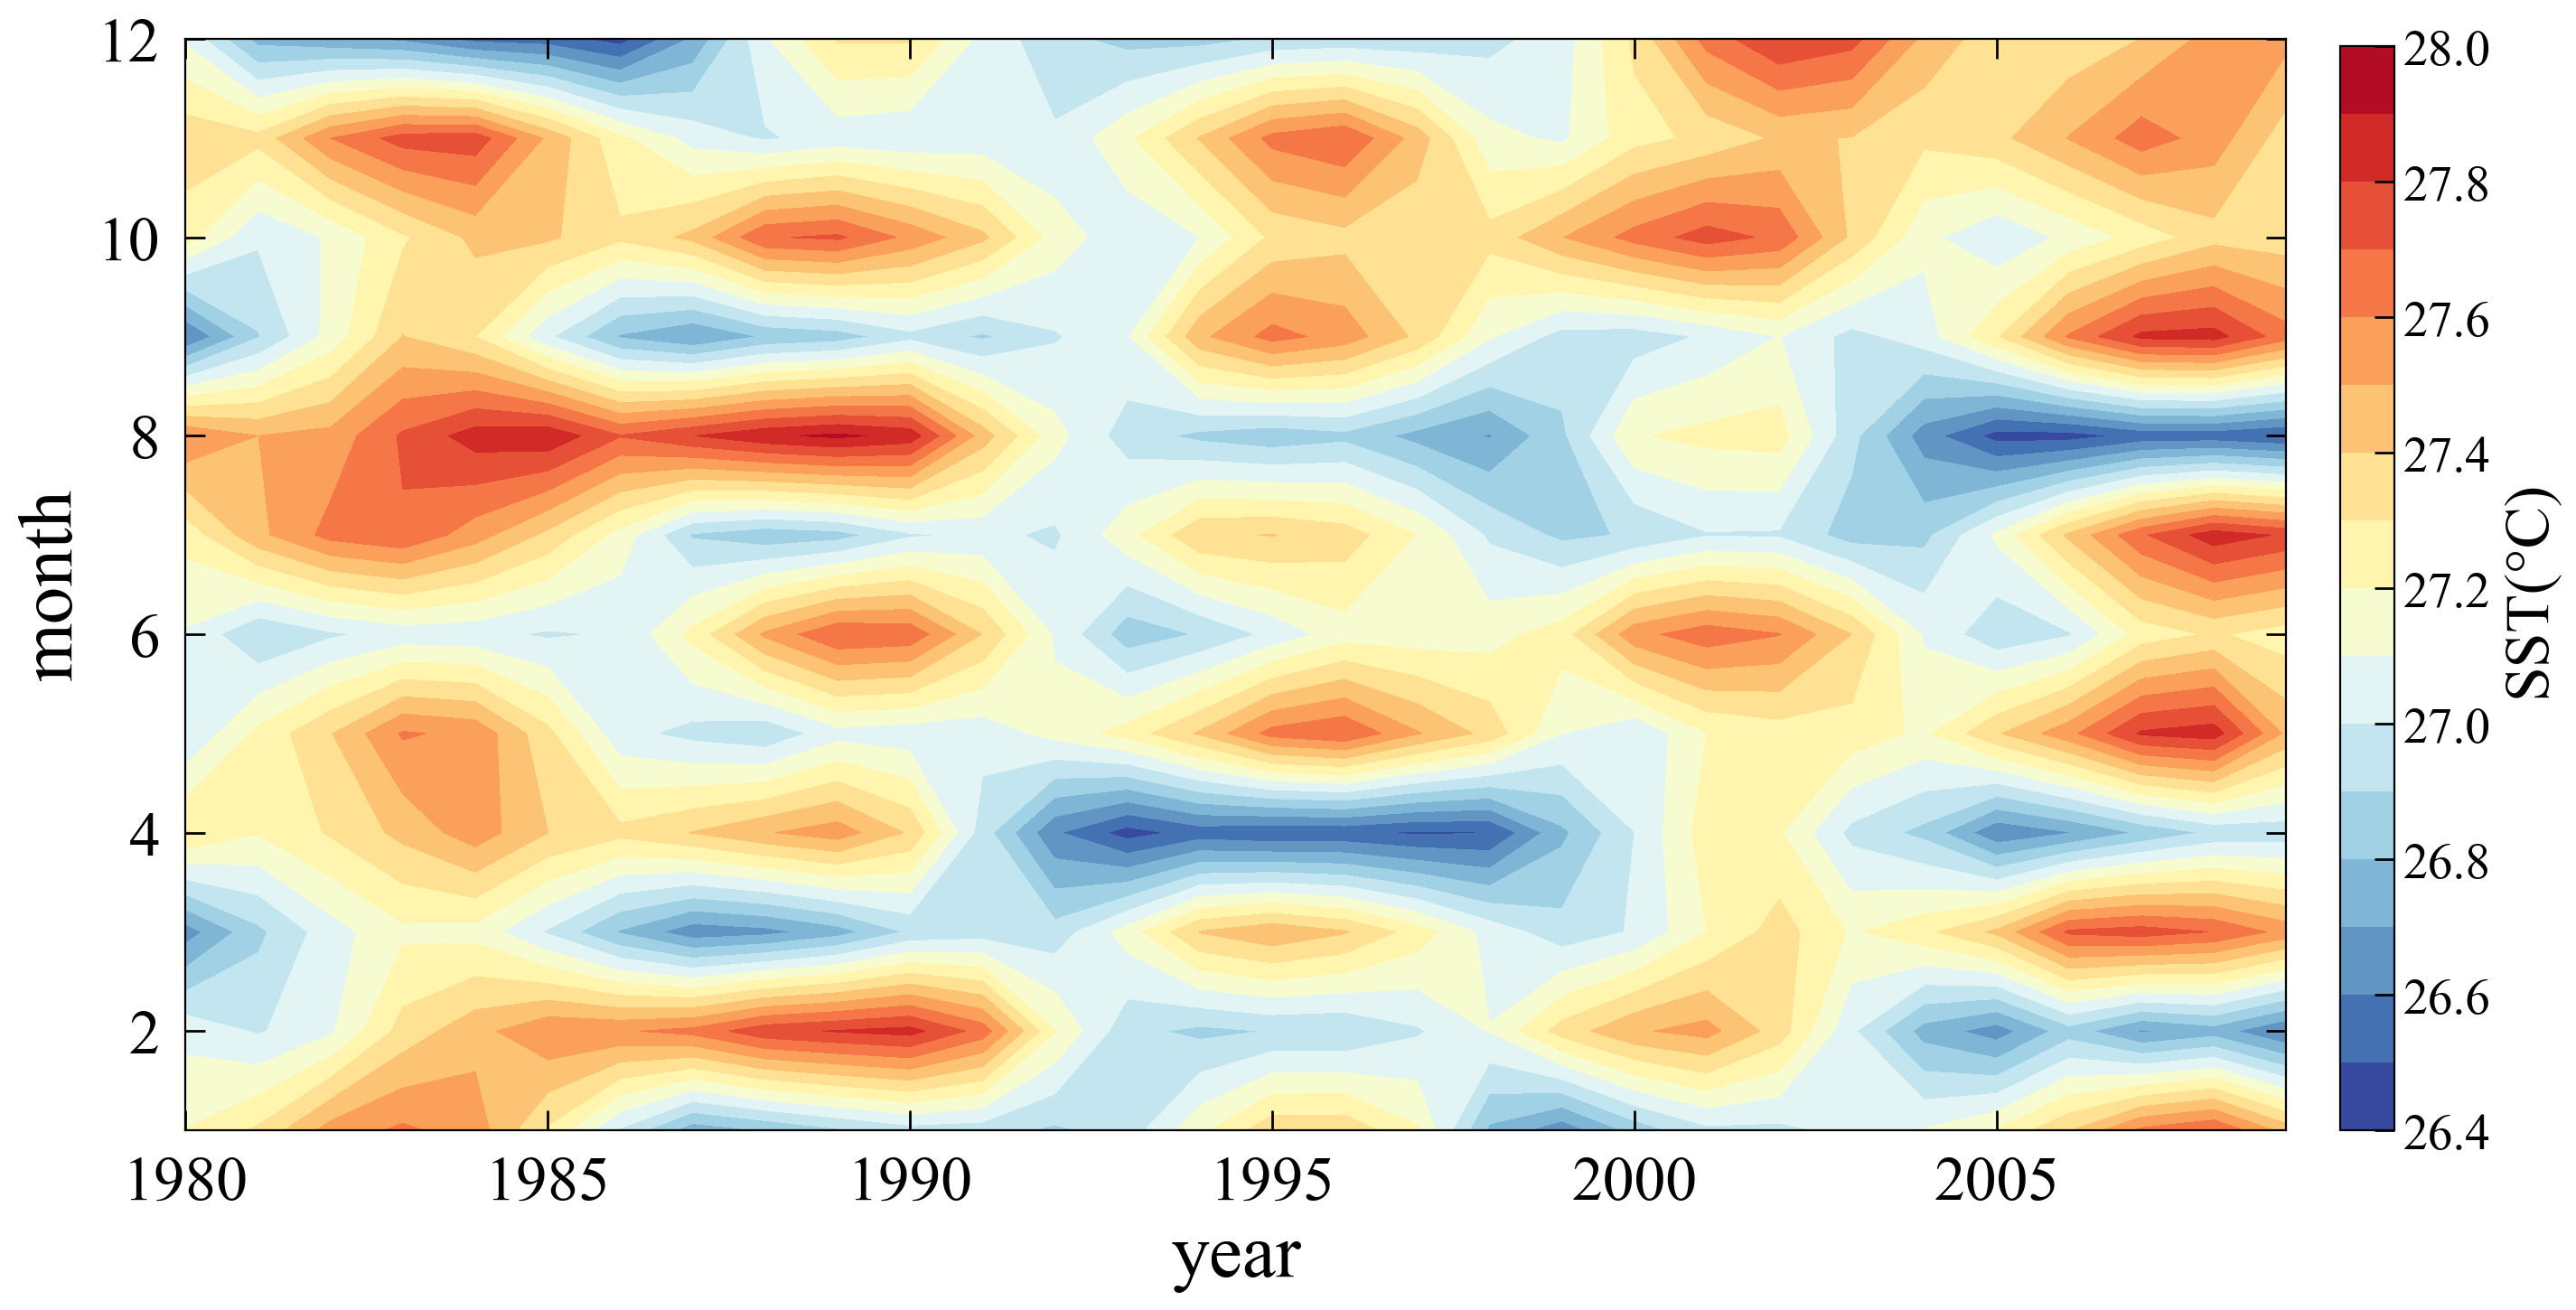

In [8]:
#画图部分（根据个人习惯绘制即可）
fig = plt.figure(figsize=(15,8),dpi=200)
ax1 = plt.subplot(111)
con1 = ax1.contourf(X,Y,sst_mean,levels=np.arange(26.4,28,0.1),cmap='RdYlBu_r')
ax1.set_xlabel('year',fontsize=30)
ax1.set_ylabel('month',fontsize=30)
ax1.tick_params(axis='x',which='major',top=True,direction='in',length=8,width=1,pad=10,labelsize=25) #设置刻度线格式+label大小
ax1.tick_params(axis='y',which='major',right=True,direction='in',length=8,width=1,pad=10,labelsize=25)

#设置colorbar
l,b,w,h = 0.92,0.125,0.02,0.75
rect = [l,b,w,h]
cbar_ax = fig.add_axes(rect)
cb = fig.colorbar(con1, cax = cbar_ax,orientation='vertical',ticklocation='right')
cb.set_label('SST(°C)',fontsize=25)
cb.ax.tick_params(direction='in',length=8,width=1,labelsize=20);

#保存图片
plt.savefig('C:/Users/LULU/Desktop/contourf.jpg',bbox_inches = 'tight')
plt.show()